In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys
cd = os.chdir
sys.path.insert(0, '/Users/undergradstudent/Research/XRB-Analysis/Notebooks')

from helpers.analysis import remove_unnamed, XrayBinary
hstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/"
chandra_hst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/"
chandra_jwst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/"
jwstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/JWST/"
M66_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/"

f555w = hstdir+"M66_mosaic_uvis_f555w_drc_sci.fits"

In [2]:
# uses 16 pc watershed algorithm 
compact_association = remove_unnamed(pd.read_csv(chandra_hst_dir+"assoc_catalog_ws16pc.frame")) 
compact_association = compact_association.rename(
    columns = {
        'reg_dolflux_Age_MinChiSq' : 'Age',
        'reg_dolflux_Age_MinChiSq_err' : 'Age Err'
    }
)
compact_association = compact_association[['reg_id', 'Age', 'Age Err']]
# dataframe containing all the point sources within the 2 sig of the chandra data  
daoclean = remove_unnamed(pd.read_csv(chandra_hst_dir+"M66_daoclean_matches.frame"))
# dataframe containing the classification and the best selected star within the 2sig
M66_notes = remove_unnamed(pd.read_csv(chandra_hst_dir+"M66_XRB_notes.txt"))  
M66_best = remove_unnamed(pd.read_csv(chandra_hst_dir+"M66_csc_bestrads.frame"))     
M66_best = M66_best[['CSC ID', '2Sig']]

In [3]:
compact_association

,reg_id,Age,Age Err
0,1.0,621.0,96.0
1,2.0,537.0,213.0
2,3.0,717.0,180.0
3,4.0,37.0,58.0
4,5.0,118.0,114.0
...,...,...,...
4239,4240.0,5.0,1.0
4240,4241.0,956.0,628.0
4241,4242.0,1.0,4.0
4242,4243.0,147.0,1682.0


In [5]:
# Dataframe containing only the HMXBs of M66
M66_hmxbs = M66_notes.query('Class == "HMXB"')
# Merge the classifications 
best_stars = pd.merge(daoclean, M66_hmxbs, left_on=['CSC ID', 'StarID'],
                      right_on=['CSC ID', 'Best Star'], how='right')
                      
best_stars

,X,Y,F555W ID,F275W ID,F336W ID,F438W ID,F814W ID,RA,Dec,CSC ID,StarID,ID,Class,Best Star,Mass,Notes
0,3743.843919,5833.507868,19247,130956.0,NaN,36055.0,NaN,170.062292,12.992626,2CXO J112014.9+125933,2,CXO003,HMXB,2.0,NaN,NaN
1,3700.317585,5908.701948,19792,NaN,NaN,36916.0,NaN,170.062784,12.993454,2CXO J112015.0+125936,1,CXO006,HMXB,1.0,NaN,NaN
2,3727.624318,5519.646556,16435,NaN,NaN,NaN,NaN,170.062475,12.989172,2CXO J112015.0+125921,1,CXO007,HMXB,1.0,NaN,NaN
3,3652.013236,5540.798551,16667,NaN,NaN,32346.0,NaN,170.063329,12.989405,2CXO J112015.2+125921,2,CXO008,HMXB,2.0,NaN,NaN
4,3834.343555,5918.287693,19852,NaN,NaN,37022.0,NaN,170.061270,12.993559,2CXO J112014.7+125937,1,CXO009,HMXB,1.0,NaN,NaN
5,3694.780748,5952.563551,20110,134991.0,NaN,NaN,NaN,170.062846,12.993936,2CXO J112015.0+125938,1,CXO010,HMXB,1.0,NaN,NaN
6,3595.444164,6102.186159,21187,NaN,NaN,39199.0,20615.0,170.063968,12.995583,2CXO J112015.3+125944,1,CXO014,HMXB,1.0,NaN,Should that be an HMXB?
7,4265.222965,6110.760032,21250,140213.0,105316.0,NaN,20690.0,170.056403,12.995677,2CXO J112013.5+125944,1,CXO019,HMXB,1.0,NaN,Probably ejected from the cluster 7924
8,4518.077121,6197.146311,21971,NaN,NaN,40508.0,21529.0,170.053547,12.996628,2CXO J112012.8+125947,1,CXO022,HMXB,1.0,NaN,NaN
9,3042.724778,6490.637342,24541,NaN,116238.0,44454.0,24097.0,170.070211,12.999858,2CXO J112016.8+125959,3,CXO024,HMXB,3.0,NaN,A cluster is very nearby


In [7]:
hmxbs = XrayBinary(best_stars)
hmxbs
hmxbs.x, hmxbs.y

(array([3743.84391871, 3700.31758519, 3727.62431814, 3652.01323594,
        3834.34355516, 3694.78074806, 3595.44416422, 4265.22296514,
        4518.07712085, 3042.7247784 , 2312.1652026 , 4177.24038083,
        3067.39724322, 2033.5279842 , 2208.45012241, 4869.45582374,
        3768.77169287, 4463.71083987, 3375.84909193]),
 array([5833.50786772, 5908.70194778, 5519.64655571, 5540.79855087,
        5918.28769259, 5952.56355082, 6102.18615896, 6110.76003175,
        6197.14631141, 6490.63734201, 5616.54098455, 7137.97546294,
        4222.60331587, 6447.47068072, 7192.85251782, 3777.64730603,
        8363.06304528, 2888.78396662, 2661.99946856]))

Change distances to separation

In [ ]:
hmxbs.calculate_distance(
    cluster_region=chandra_hst_dir+"M66_assoc1_catalog_ws16pc_fk5.reg",
    cluster_name='Compact Association',
    search_radius=0.0005,
    coordsys='fk5',
    filename=f555w,
    instrument='wfc3',
    shorten_df=True,
    additional_cols=['Best Star'],
    unit_of_dist='km',
)
hmxbs

Finding cross-references between sources. This will take a few minutes. Please wait.. 
DONE WITH CLEANING. CREATING DATAFRAME...


,CSC ID,X,Y,RA,Dec,Compact Association ID,Compact Association RA,Compact Association Dec,Distance,Best Star
0,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2897.0,170.063859,12.995397,1.080685e+15,1.0
1,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2900.0,170.064119,12.995452,9.939119e+14,1.0
2,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2914.0,170.063837,12.995771,1.147125e+15,1.0
3,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2918.0,170.064063,12.995848,1.414908e+15,1.0
4,2CXO J112013.5+125944,4265.222965,6110.760032,170.056403,12.995677,2901.0,170.056258,12.995474,1.250321e+15,1.0
5,2CXO J112012.8+125947,4518.077121,6197.146311,170.053547,12.996628,2981.0,170.053400,12.996816,1.192999e+15,1.0
6,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3167.0,170.070433,12.999909,1.120136e+15,3.0
7,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3172.0,170.069891,13.000019,1.771167e+15,3.0
8,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3174.0,170.070162,13.000063,1.062133e+15,3.0
9,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3184.0,170.070388,13.000173,1.810945e+15,3.0


In [9]:
# Merging the ages of the clusters to the dataframes
hmxbs.df = pd.merge(hmxbs.df, compact_association, left_on='Compact Association ID',
                    right_on='reg_id', how='left')
hmxbs.df = pd.merge(hmxbs.df, M66_best, )
hmxbs.df

,CSC ID,X,Y,RA,Dec,Compact Association ID,Compact Association RA,Compact Association Dec,Distance,Best Star,reg_id,Age,Age Err,2Sig
0,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2897.0,170.063859,12.995397,1.080685e+15,1.0,2897.0,667.0,234.0,0.346187
1,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2900.0,170.064119,12.995452,9.939119e+14,1.0,2900.0,6.0,2.0,0.346187
2,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2914.0,170.063837,12.995771,1.147125e+15,1.0,2914.0,667.0,438.0,0.346187
3,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2918.0,170.064063,12.995848,1.414908e+15,1.0,2918.0,261.0,114.0,0.346187
4,2CXO J112013.5+125944,4265.222965,6110.760032,170.056403,12.995677,2901.0,170.056258,12.995474,1.250321e+15,1.0,2901.0,147.0,79.0,0.303917
5,2CXO J112012.8+125947,4518.077121,6197.146311,170.053547,12.996628,2981.0,170.053400,12.996816,1.192999e+15,1.0,2981.0,349.0,106.0,0.277362
6,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3167.0,170.070433,12.999909,1.120136e+15,3.0,3167.0,8.0,1.0,0.502163
7,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3172.0,170.069891,13.000019,1.771167e+15,3.0,3172.0,7.0,1.0,0.502163
8,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3174.0,170.070162,13.000063,1.062133e+15,3.0,3174.0,7.0,1.0,0.502163
9,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3184.0,170.070388,13.000173,1.810945e+15,3.0,3184.0,169.0,51.0,0.502163


In [10]:
hmxbs.df['Distance'][0]/hmxbs.df['Age'][0]

np.float64(1620217618846.7168)

In [11]:
hmxbs.calculate_velocity(
    velocity_headers=['Distance', 'Age'],
    velocity_err_headers=['2Sig', 'Age Err'],
    calc_err=True
)
hmxbs

,CSC ID,X,Y,RA,Dec,Compact Association ID,Compact Association RA,Compact Association Dec,Distance,Best Star,reg_id,Age,Age Err,2Sig,Velocity,Velocity Err
0,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2897.0,170.063859,12.995397,1.080685e+15,1.0,2897.0,667.0,234.0,0.346187,0.051343,0.072609
1,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2900.0,170.064119,12.995452,9.939119e+14,1.0,2900.0,6.0,2.0,0.346187,5.249302,7.423635
2,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2914.0,170.063837,12.995771,1.147125e+15,1.0,2914.0,667.0,438.0,0.346187,0.054499,0.077073
3,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2918.0,170.064063,12.995848,1.414908e+15,1.0,2918.0,261.0,114.0,0.346187,0.171788,0.242945
4,2CXO J112013.5+125944,4265.222965,6110.760032,170.056403,12.995677,2901.0,170.056258,12.995474,1.250321e+15,1.0,2901.0,147.0,79.0,0.303917,0.269531,0.381175
5,2CXO J112012.8+125947,4518.077121,6197.146311,170.053547,12.996628,2981.0,170.053400,12.996816,1.192999e+15,1.0,2981.0,349.0,106.0,0.277362,0.108323,0.153192
6,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3167.0,170.070433,12.999909,1.120136e+15,3.0,3167.0,8.0,1.0,0.502163,4.436962,6.274811
7,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3172.0,170.069891,13.000019,1.771167e+15,3.0,3172.0,7.0,1.0,0.502163,8.018006,11.339172
8,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3174.0,170.070162,13.000063,1.062133e+15,3.0,3174.0,7.0,1.0,0.502163,4.808235,6.799871
9,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3184.0,170.070388,13.000173,1.810945e+15,3.0,3184.0,169.0,51.0,0.502163,0.339565,0.480218


In [24]:
hmxbs.distance, hmxbs.velocity

(array([1.08068515e+15, 9.93911895e+14, 1.14712517e+15, 1.41490786e+15,
        1.25032088e+15, 1.19299930e+15, 1.12013588e+15, 1.77116672e+15,
        1.06213273e+15, 1.81094517e+15, 2.47898705e+15, 1.42855831e+15,
        6.71071005e+14, 2.22796198e+15, 1.48400979e+15, 2.35535610e+15,
        2.11496818e+15, 8.61536789e+14, 1.89427883e+15, 2.45125151e+15,
        2.26249486e+15, 1.08638010e+15, 1.99281588e+15, 2.27918331e+15,
        1.13056611e+15, 2.09018239e+15, 2.09289648e+15, 2.27649256e+15,
        2.29779242e+15]),
 array([5.13426524e-02, 5.24930235e+00, 5.44991749e-02, 1.71787912e-01,
        2.69531234e-01, 1.08322759e-01, 4.43696162e+00, 8.01800556e+00,
        4.80823519e+00, 3.39565491e-01, 7.85559724e+01, 2.26346053e+01,
        1.11923124e+00, 1.76503261e+01, 9.40527963e+00, 1.49276527e+01,
        1.34041347e-01, 3.84521324e-01, 1.20054613e+01, 1.55354136e+01,
        7.96617867e+00, 1.22512509e-01, 1.26299643e+01, 1.44448888e+01,
        7.16524278e+00, 2.35712610e-01

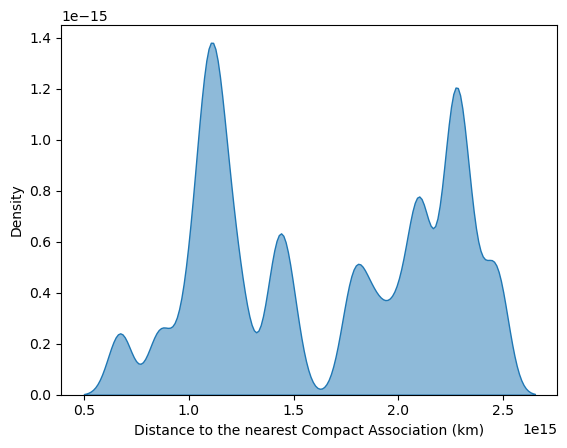

In [25]:
hmxbs.plot_kde(
    data=hmxbs.df, x='Distance', bw_adjust=0.2,
    label='Distance to the nearest Compact Association (km)',
)

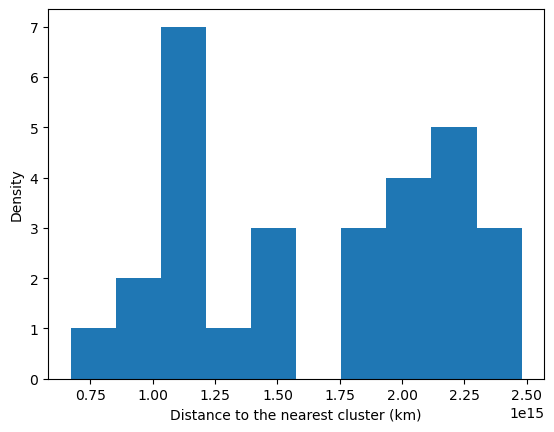

In [15]:
hmxbs.plot_hist(x=hmxbs.df['Distance'], bins=10)

In [17]:
hmxbs.df['Velocity (rounded)'] = np.round(hmxbs.df['Velocity'].values, decimals=2)

hmxbs.make_regions(
    outfile='/Users/undergradstudent/Downloads/test_code.reg',
    reg_type='ruler',
    additional_coords=['Compact Association RA', 'Compact Association Dec'],
    coordsys='fk5',
    idheader='Velocity (rounded)',
    color='blue'
)

Saving /Users/undergradstudent/Downloads/test_code.reg
/Users/undergradstudent/Downloads/test_code.reg saved!


In [12]:
new_xrbs = hmxbs.df.query('10.0 > Age > 0.0')
new_xrbs

,CSC ID,X,Y,RA,Dec,Compact Association ID,Compact Association RA,Compact Association Dec,Distance,Best Star,reg_id,Age,Age Err,2Sig,Velocity,Velocity Err
1,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2900.0,170.064119,12.995452,9.939119e+14,1.0,2900.0,6.0,2.0,0.346187,5.249302,7.423635
6,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3167.0,170.070433,12.999909,1.120136e+15,3.0,3167.0,8.0,1.0,0.502163,4.436962,6.274811
7,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3172.0,170.069891,13.000019,1.771167e+15,3.0,3172.0,7.0,1.0,0.502163,8.018006,11.339172
8,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3174.0,170.070162,13.000063,1.062133e+15,3.0,3174.0,7.0,1.0,0.502163,4.808235,6.799871
10,2CXO J112018.8+125924,2312.165203,5616.540985,170.078462,12.990238,2646.0,170.078655,12.989783,2.478987e+15,2.0,2646.0,1.0,0.0,0.478708,78.555972,NaN
11,2CXO J112018.8+125924,2312.165203,5616.540985,170.078462,12.990238,2663.0,170.078407,12.989960,1.428558e+15,2.0,2663.0,2.0,0.0,0.478708,22.634605,NaN
13,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3753.0,170.057105,13.006644,2.227962e+15,4.0,3753.0,4.0,2.0,0.597313,17.650326,24.961331
14,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3758.0,170.057410,13.006688,1.484010e+15,4.0,3758.0,5.0,1.0,0.597313,9.405280,13.301074
15,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3762.0,170.056992,13.006732,2.355356e+15,4.0,3762.0,5.0,1.0,0.597313,14.927653,21.110889
18,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3816.0,170.057105,13.007228,1.894279e+15,4.0,3816.0,5.0,105.0,0.597313,12.005461,16.978286


In [13]:
old_xrbs = hmxbs.df.query('Age > 10')
old_xrbs

,CSC ID,X,Y,RA,Dec,Compact Association ID,Compact Association RA,Compact Association Dec,Distance,Best Star,reg_id,Age,Age Err,2Sig,Velocity,Velocity Err
0,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2897.0,170.063859,12.995397,1.080685e+15,1.0,2897.0,667.0,234.0,0.346187,0.051343,0.072609
2,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2914.0,170.063837,12.995771,1.147125e+15,1.0,2914.0,667.0,438.0,0.346187,0.054499,0.077073
3,2CXO J112015.3+125944,3595.444164,6102.186159,170.063968,12.995583,2918.0,170.064063,12.995848,1.414908e+15,1.0,2918.0,261.0,114.0,0.346187,0.171788,0.242945
4,2CXO J112013.5+125944,4265.222965,6110.760032,170.056403,12.995677,2901.0,170.056258,12.995474,1.250321e+15,1.0,2901.0,147.0,79.0,0.303917,0.269531,0.381175
5,2CXO J112012.8+125947,4518.077121,6197.146311,170.053547,12.996628,2981.0,170.053400,12.996816,1.192999e+15,1.0,2981.0,349.0,106.0,0.277362,0.108323,0.153192
9,2CXO J112016.8+125959,3042.724778,6490.637342,170.070211,12.999858,3184.0,170.070388,13.000173,1.810945e+15,3.0,3184.0,169.0,51.0,0.502163,0.339565,0.480218
12,2CXO J112018.8+125924,2312.165203,5616.540985,170.078462,12.990238,2688.0,170.078429,12.990367,6.710710e+14,2.0,2688.0,19.0,9.0,0.478708,1.119231,1.582832
16,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3780.0,170.056981,13.006876,2.114968e+15,4.0,3780.0,500.0,35.0,0.597313,0.134041,0.189563
17,2CXO J112013.7+130025,4177.240381,7137.975463,170.057397,13.006982,3781.0,170.057252,13.006887,8.615368e+14,4.0,3781.0,71.0,65.0,0.597313,0.384521,0.543795
21,2CXO J112016.7+125830,3067.397243,4222.603316,170.069932,12.974897,1088.0,170.070093,12.974750,1.086380e+15,1.0,1088.0,281.0,123.0,0.542665,0.122513,0.173259


# Make KDEs

In [18]:
# dist = np.sort(hmxbs.distance) # in kms
dist = hmxbs.distance
dist = dist / 30856775812800   # in pc
dist

array([35.02262059, 32.21049084, 37.17579503, 45.85404075, 40.52014011,
       38.66247414, 36.30113156, 57.39960415, 34.42137755, 58.68873604,
       80.33849889, 46.29642172, 21.74793013, 72.2033303 , 48.09348189,
       76.33189276, 68.54145062, 27.92050582, 61.3893961 , 79.43965121,
       73.32246492, 35.20718144, 64.58276433, 73.86330061, 36.63915244,
       67.73819812, 67.82615563, 73.7760993 , 74.46638095])

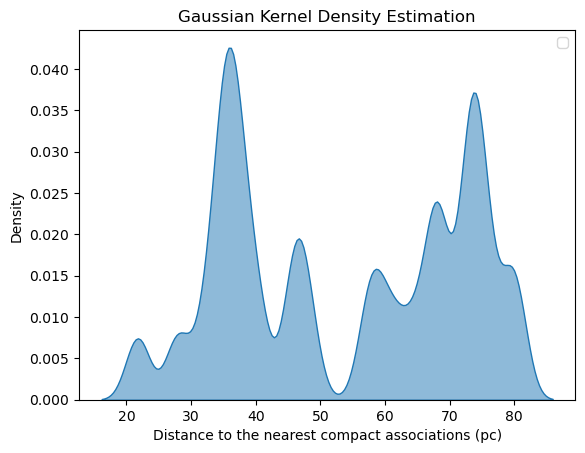

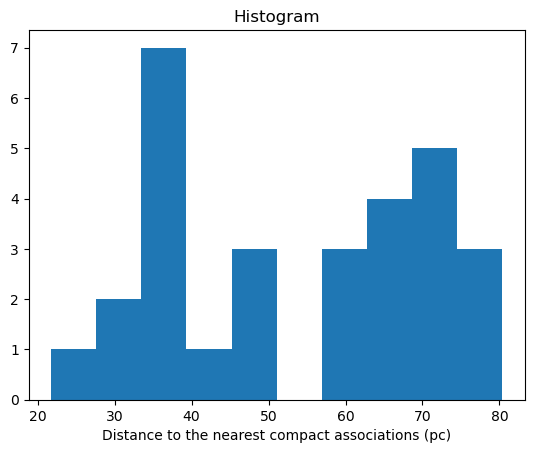

In [19]:
import seaborn as sns
sns.kdeplot(x=dist, bw_adjust=0.2,
            fill=True, alpha=0.5)
plt.title('Gaussian Kernel Density Estimation')
legend = plt.legend()
plt.xlabel('Distance to the nearest compact associations (pc)')
plt.show()

plt.hist(dist, bins=10)
plt.title('Histogram')
plt.xlabel('Distance to the nearest compact associations (pc)')
plt.show()

<Axes: ylabel='Velocity'>

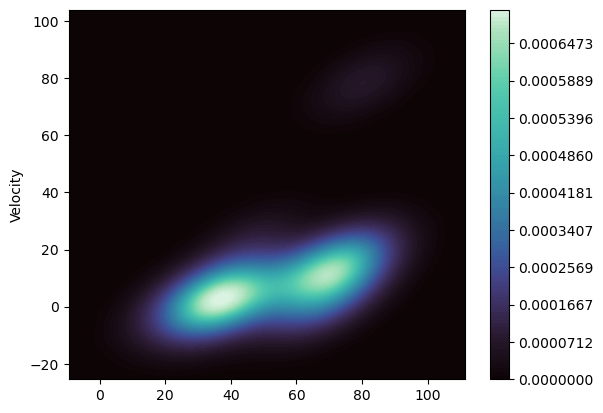

In [20]:
sns.kdeplot(
    data=hmxbs.df, x=dist, y="Velocity",
    fill=True, thresh=0, levels=100, cmap="mako",
    cbar=True
)

<Axes: ylabel='Age'>

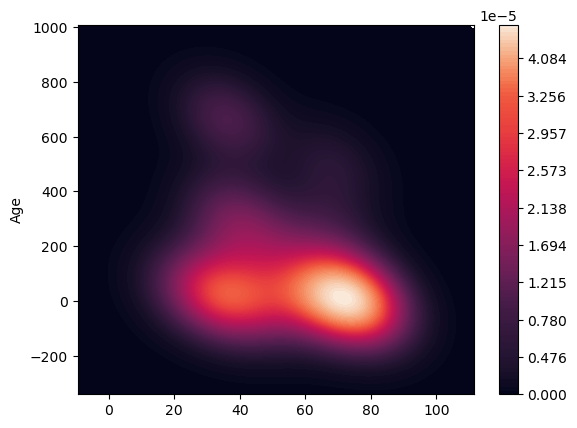

In [21]:
sns.kdeplot(
    data=hmxbs.df, x=dist, y="Age",
    fill=True, thresh=0, levels=100, cmap="rocket",
    cbar=True
)